# Imports

In [1]:
%matplotlib notebook

from extraction import Seasonality


import pandas as pd
import matplotlib.pyplot as plt

import Util
from extraction import Time
from visualization import visualize

# Loading data and selecting single KPI

In [2]:
df = Util.load_train(refreshPickle=True)

In [3]:
Time.format_timestamp(df)

In [4]:
KPI_IDs = df["KPI ID"].unique()
KPI_IDs

array(['02e99bd4f6cfb33f', '9bd90500bfd11edb', 'da403e4e3f87c9e0',
       'a5bf5d65261d859a', '18fbb1d5a5dc099d', '09513ae3e75778a3',
       'c58bfcbacb2822d1', '1c35dbf57f55f5e4', '046ec29ddf80d62e',
       '07927a9a18fa19ae', '54e8a140f6237526', 'b3b2e6d1a791d63a',
       '8a20c229e9860d0c', '769894baefea4e9e', '76f4550c43334374',
       'e0770391decc44ce', '8c892e5525f3e491', '40e25005ff8992bd',
       'cff6d3c01e6a6bfa', '71595dd7171f4540', '7c189dd36f048a6c',
       'a40b1df87e3f1c87', '8bef9af9a922e0b3', 'affb01ca2b4f0b45',
       '9ee5879409dccef9', '88cf3a776ba00e7c'], dtype=object)

In [5]:
single_KPI = df[df["KPI ID"] == KPI_IDs[0]]

## Fill NA with means

In [6]:
single_KPI = Time.fill_nas(single_KPI)

# 1- Timeseries extension

In [7]:
extended_df = Seasonality.extend_timeseries(single_KPI)

<IPython.core.display.Javascript object>


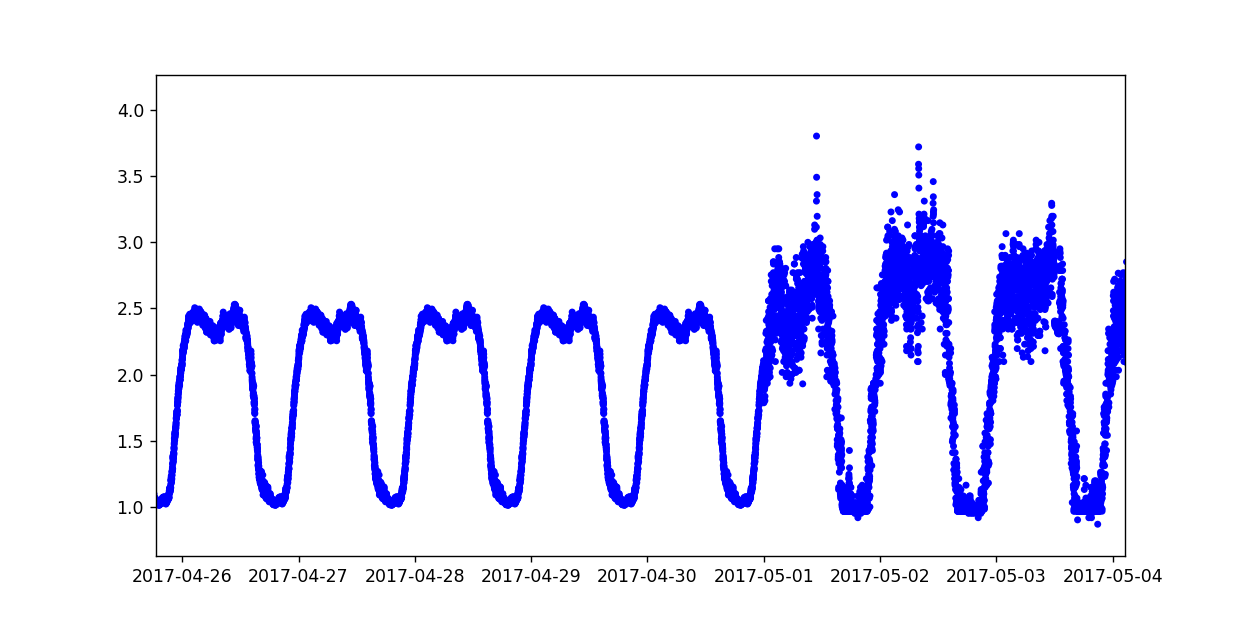

[]

In [13]:
fig1 = visualize.visualize_anomalies(extended_df.index,extended_df.value.values,extended_df.label.values)
plt.plot()

# 2- Big trend

In [9]:
single_KPI_copy = single_KPI.copy()

In [10]:
Seasonality.extract_big_trend(single_KPI)

<IPython.core.display.Javascript object>


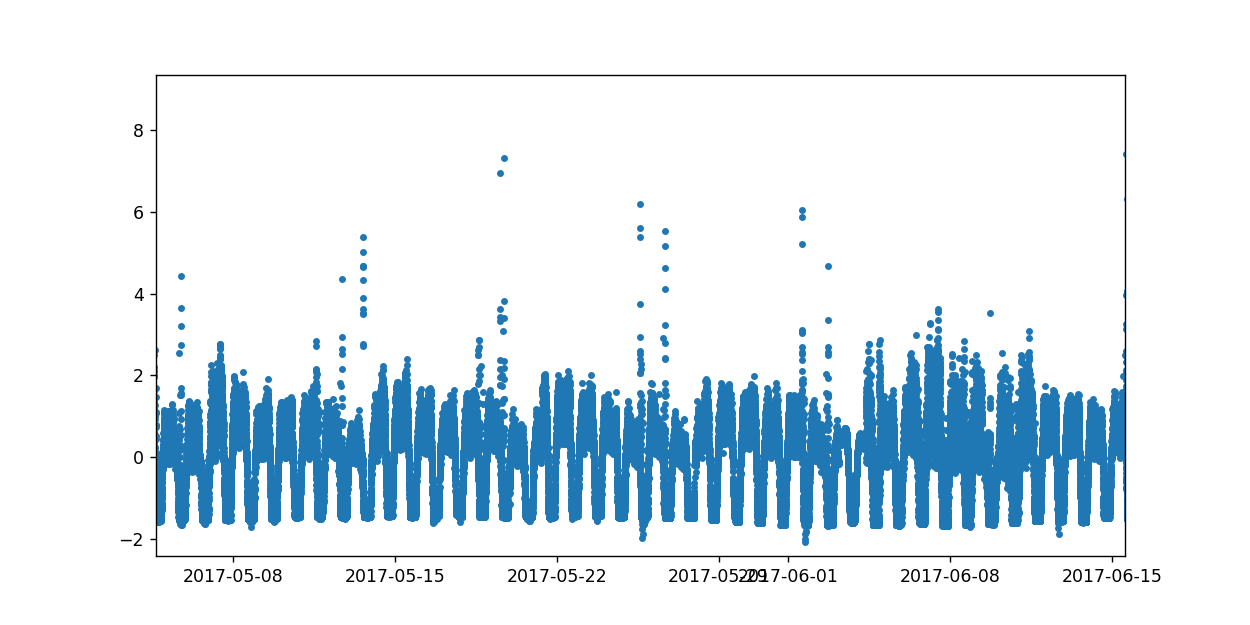

In [11]:
fig2 = visualize.visualize_timeserie(single_KPI.index,single_KPI[Seasonality.BIG_TREND_EXTRACTED].values)

<IPython.core.display.Javascript object>


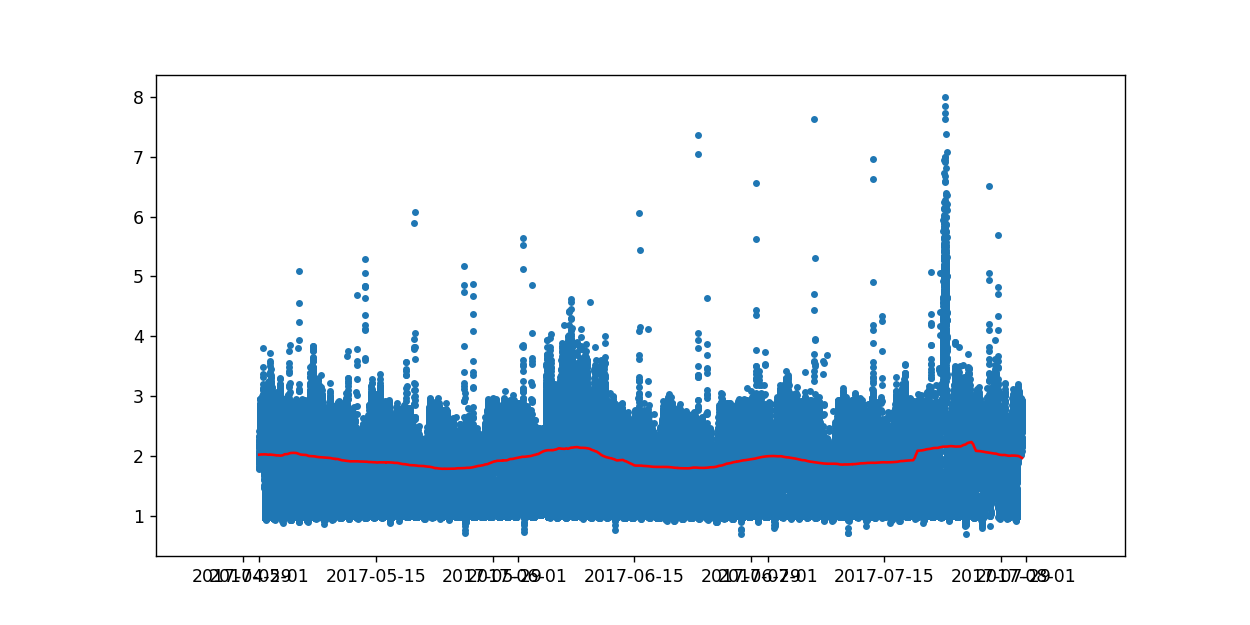

In [12]:
    fig4, ax4 = plt.subplots(figsize=(10, 5))
    ax4.scatter(single_KPI_copy.timestamp.values,single_KPI_copy.value.values,
               marker='.')
    ax4.plot(single_KPI_copy.timestamp.values,single_KPI.big_trend_means.values,color = 'r')

# 3- Weekly Trend

In [86]:
Seasonality.extract_weekly_seasonality(single_KPI)

<IPython.core.display.Javascript object>


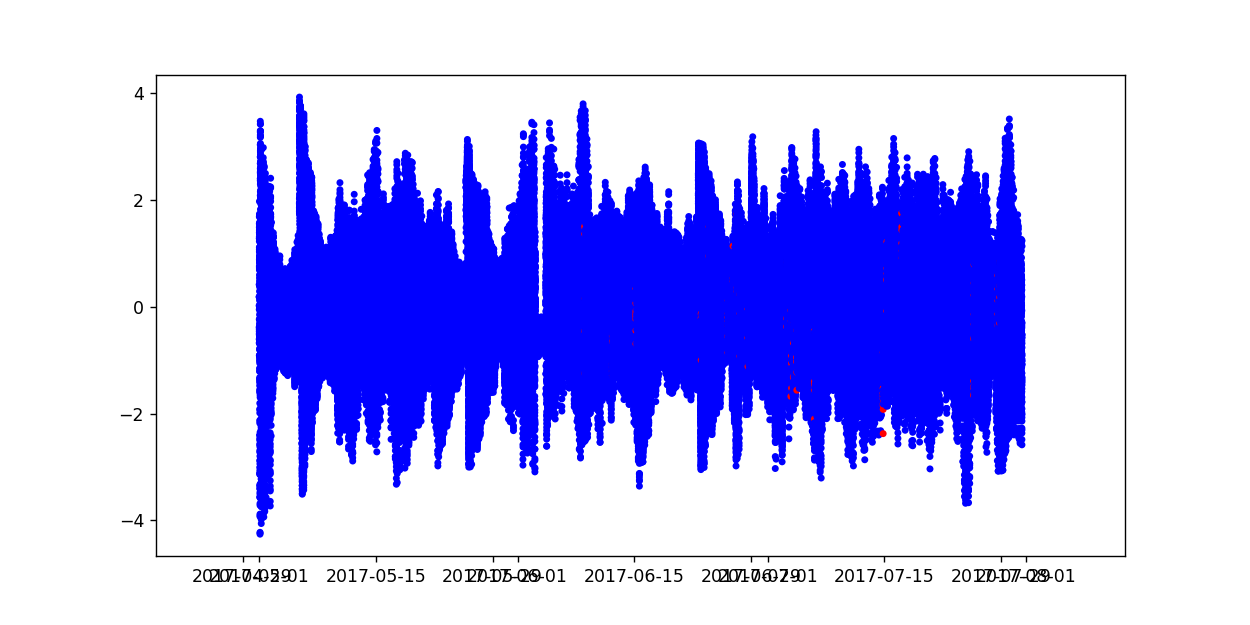

In [87]:
fig2 = visualize.visualize_anomalies(single_KPI.index,single_KPI[Seasonality.WEEKLY_EXTRACTED].values,single_KPI.label.values)

In [88]:
single_KPI.columns

Index(['timestamp', 'value', 'label', 'KPI ID', 'minute', 'day',
       'minute_of_week', 'imputed', 'big_trend_means', 'big_trend_stds',
       'big_trend_extracted', 'daily_averages', 'weekly_extracted'],
      dtype='object')

<IPython.core.display.Javascript object>


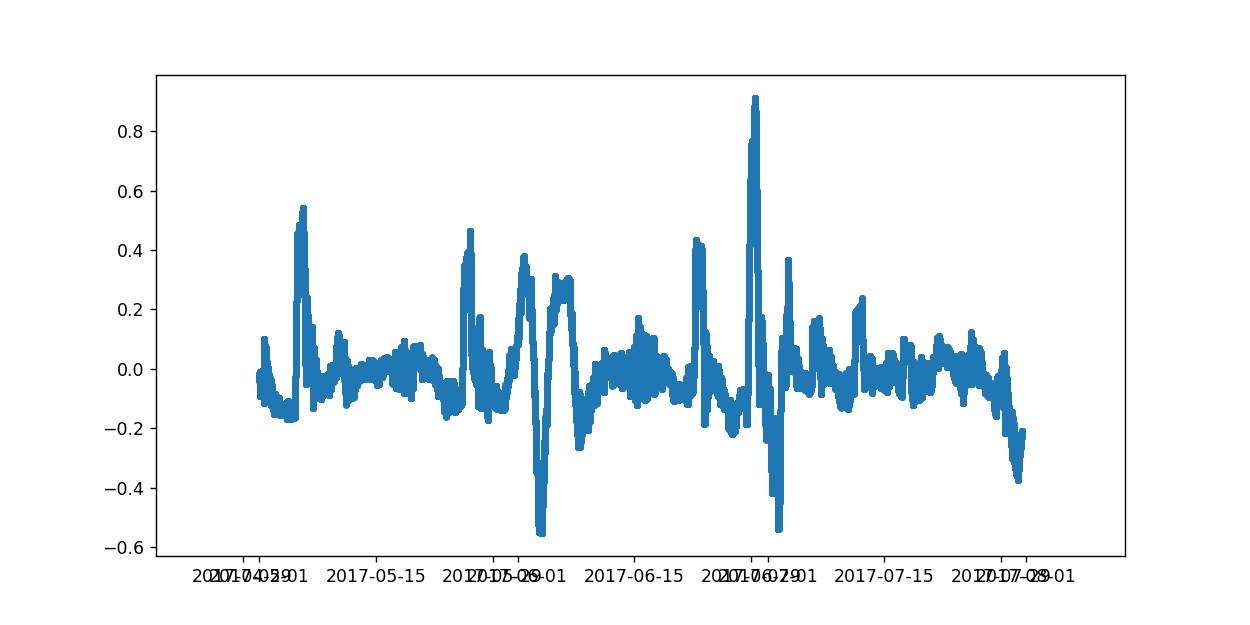

In [89]:
fig = visualize.visualize_timeserie(single_KPI.timestamp.values,single_KPI.daily_averages.values)

In [90]:
av = single_KPI.groupby(['minute_of_week']).daily_averages.mean()

<IPython.core.display.Javascript object>


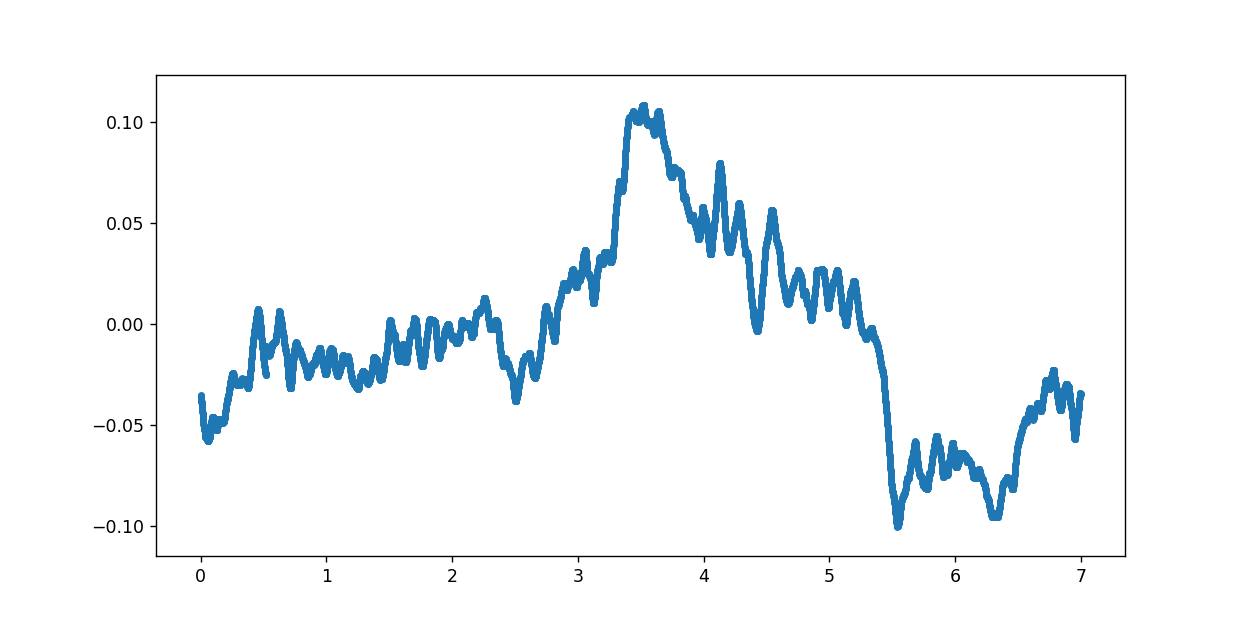

In [91]:
fig = visualize.visualize_timeserie(av.index/1440,av.values)

# 4- Daily Trend

In [92]:
Seasonality.extract_daily_seasonality(single_KPI)

In [93]:
single_KPI.columns

Index(['timestamp', 'value', 'label', 'KPI ID', 'minute', 'day',
       'minute_of_week', 'imputed', 'big_trend_means', 'big_trend_stds',
       'big_trend_extracted', 'daily_averages', 'weekly_extracted',
       'extracted_daily'],
      dtype='object')

In [94]:
av = single_KPI.groupby(['minute']).weekly_extracted.mean()

<IPython.core.display.Javascript object>


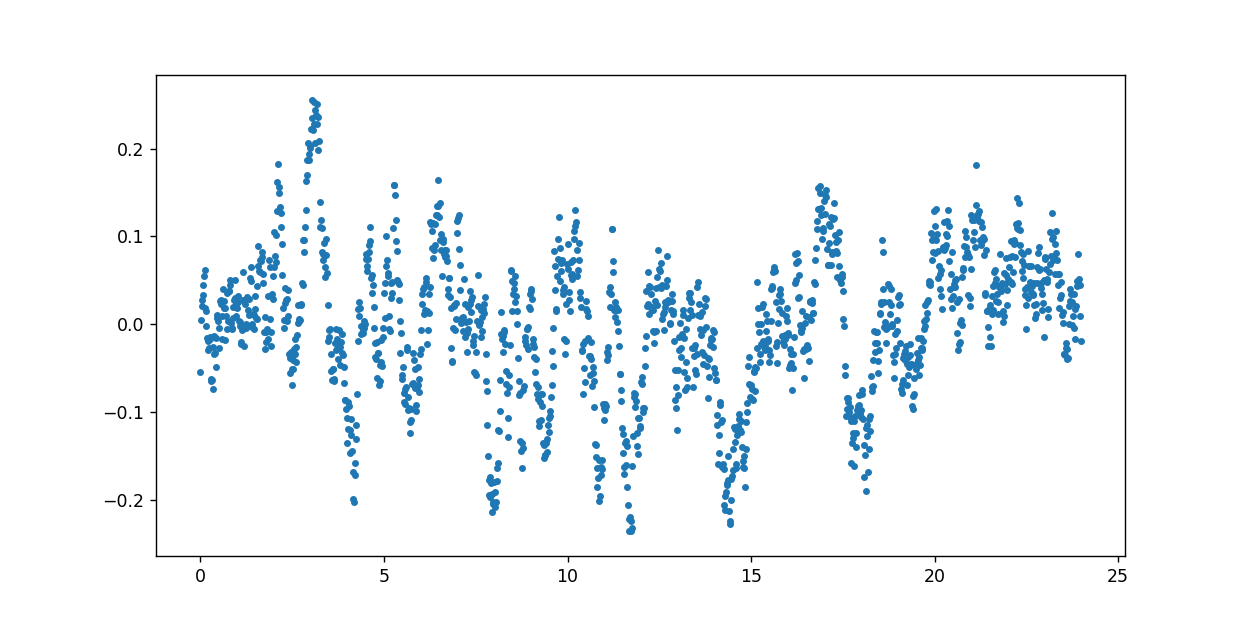

In [95]:
fig = visualize.visualize_timeserie(av.index/60,av.values)

<IPython.core.display.Javascript object>


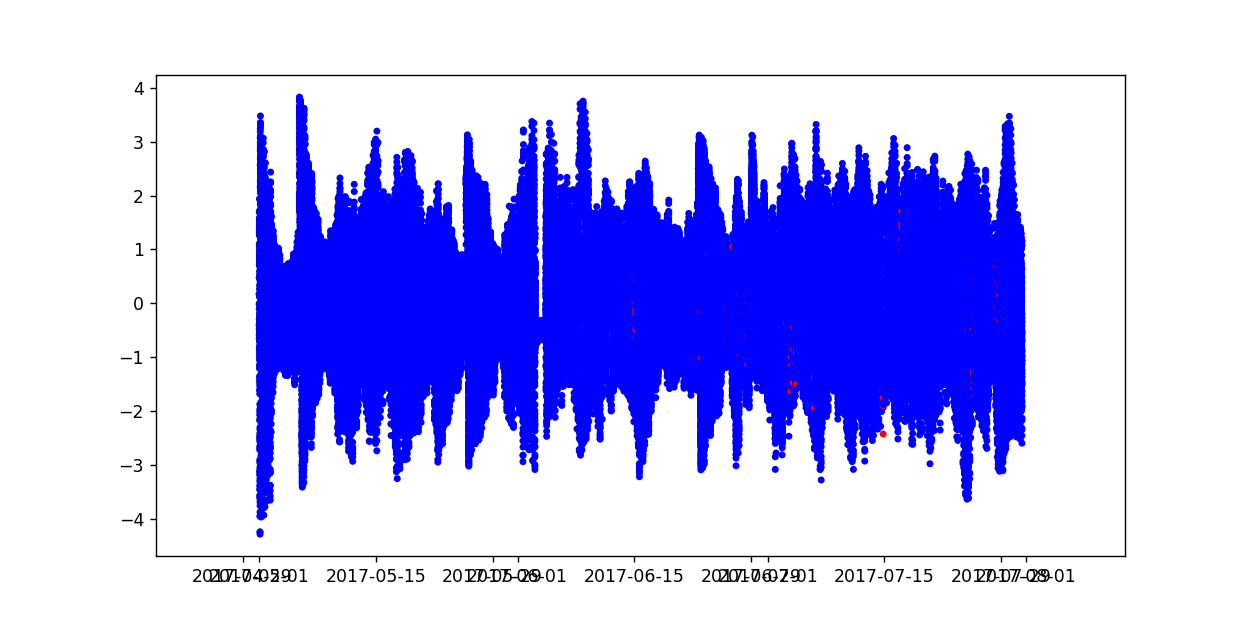

In [96]:
fig2 = visualize.visualize_anomalies(single_KPI.index,single_KPI[Seasonality.EXTRACTED_DAILY].values,single_KPI.label.values)